In [7]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

from PIL_Functions import img_to_matrix
from PIL_Functions import matrix_to_img
from PIL_Functions import soma_linhas

In [52]:
plt.rcParams['font.size'] = 19
plt.rcParams['axes.linewidth'] = 1.5

# Funções Auxiliares

In [44]:
def threshold(matrix, t, color):
    new_matrix = matrix.copy()
    
    width = len(matrix[0])
    height= len(matrix)
    
    for linha in range(height):
        for coluna in range(width):
            if new_matrix[linha][coluna] <= t:
                new_matrix[linha][coluna] = color
                
    return new_matrix

def integrate(linha):
    integral = 0
    for i in linha:
        integral += i
    return integral

def normalize(linha):
    maximo = max(linha)
    return [i/maximo for i in linha]

# Atenuação

In [130]:
aten = ['30', '40', '50', '60', '70', '80']
path = ['/Users/thomasgaehtgens/Desktop/LFEA/High Harmonic Generation/Dados/ensaios atenuacao/hhg_Ar12.8mbar_I177_100hz_' + i + 'deg_100ms.jpg' for i in aten]

In [131]:
images = [Image.open(i) for i in path]

matrxs = [img_to_matrix(i) for i in images]

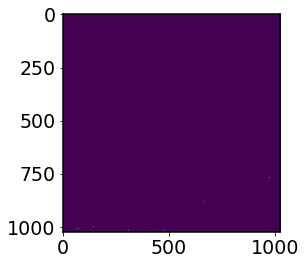

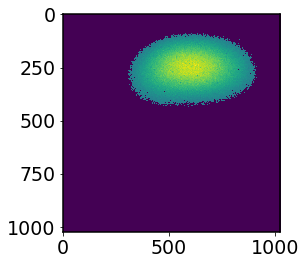

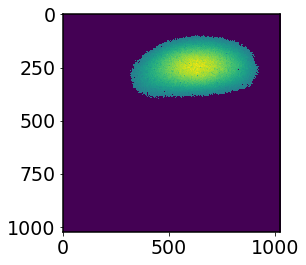

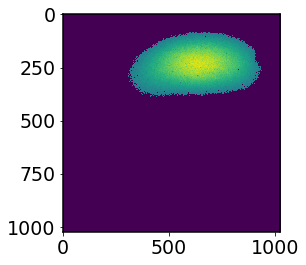

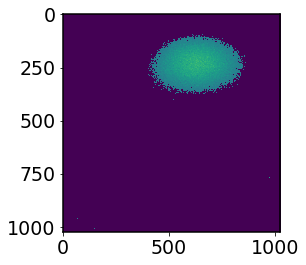

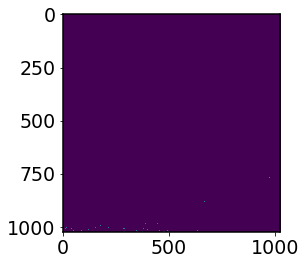

In [134]:
linhas = list()
for i in range(len(matrxs)):
    new_matrix = threshold(matrxs[i], t = 105, color = 0) #com 80 uma delas fica bue pretty
    new_img    = matrix_to_img(new_matrix)
    
    plt.figure()
    plt.imshow(new_img)
    
    #if i == 1:
    #    plt.imsave('test.png', np.array(new_img), cmap='gray')
    
    linhas.append(soma_linhas(new_matrix))

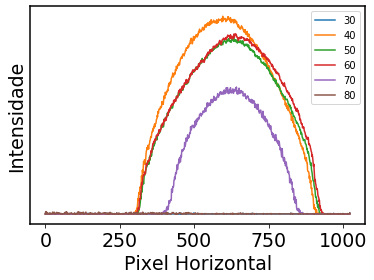

In [79]:
i = 0
for hist in linhas:
    plt.plot(hist, label = aten[i])
    plt.legend(fontsize = 10)
    plt.yticks([])
    plt.ylabel('Intensidade')
    plt.xlabel('Pixel Horizontal')
    i += 1

In [42]:
aten_x = [int(i) for i in aten]
aten_y = [integrate(linha) for linha in linhas]

(0, 1.1)

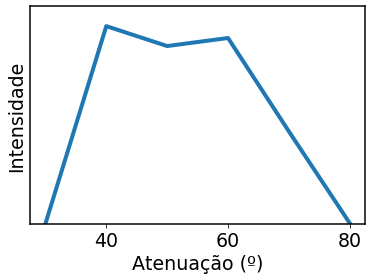

In [122]:
plt.plot(aten_x, normalize(aten_y), lw = 4)
plt.yticks([])
plt.ylabel('Intensidade')
plt.xlabel('Atenuação (º)')

plt.ylim(0, 1.1)

# Pressão

In [83]:
pres = ['14.5', '15', '15.5', '16', '16.5']
path = ['/Users/thomasgaehtgens/Desktop/LFEA/High Harmonic Generation/Dados/ensaios pressao 2/hhg_Ar' + i + 'mbar_I177_100hz_50deg_100ms.jpg' for i in pres]

In [99]:
images = [Image.open(i) for i in path]

matrxs = [img_to_matrix(i) for i in images]

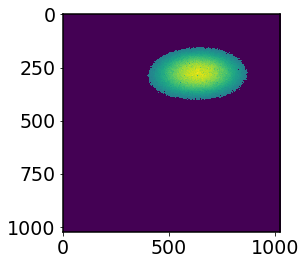

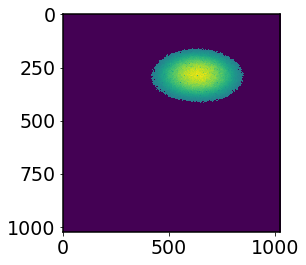

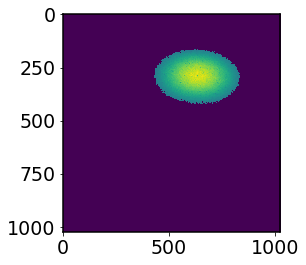

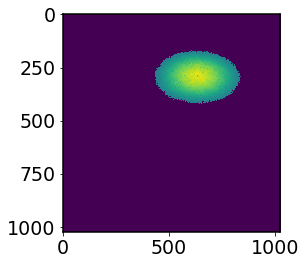

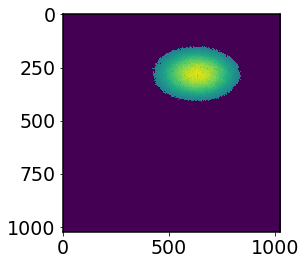

In [100]:
linhas = list()
for i in range(len(matrxs)):
    new_matrix = threshold(matrxs[i], t = 105, color = 0) #com 80 uma delas fica bue pretty
    new_img    = matrix_to_img(new_matrix)
    
    plt.figure()
    plt.imshow(new_img)
    
    linhas.append(soma_linhas(new_matrix))

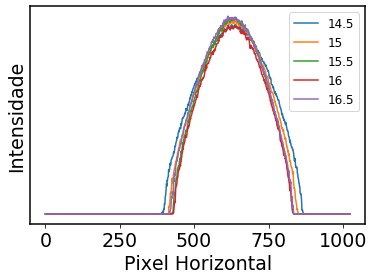

In [101]:
i = 0
for hist in linhas:
    plt.plot(hist, label = pres[i])
    plt.legend(fontsize = 12)
    plt.yticks([])
    plt.ylabel('Intensidade')
    plt.xlabel('Pixel Horizontal')
    i += 1

In [125]:
pres_x = [float(i) for i in pres]
pres_y = [integrate(linha) for linha in linhas]

(0, 1.1)

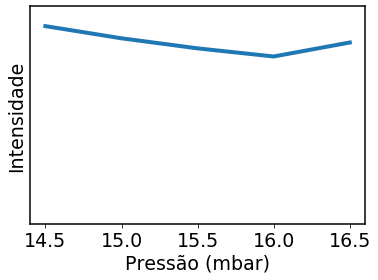

In [123]:
plt.plot(pres_x, normalize(pres_y), lw = 4)
plt.yticks([])
plt.ylabel('Intensidade')
plt.xlabel('Pressão (mbar)')

plt.ylim(0, 1.1)

# Ìris

In [106]:
iris = ['-423', '-223', '-23', '177', '377', '577', '777', '928']
path = ['/Users/thomasgaehtgens/Desktop/LFEA/High Harmonic Generation/Dados/ensaios iris/100Hz/hhg_Ar10mbar_I' + i + '_100hz_40deg_100ms.jpg' for i in iris]

In [114]:
images = [Image.open(i) for i in path]

matrxs = [img_to_matrix(i) for i in images]

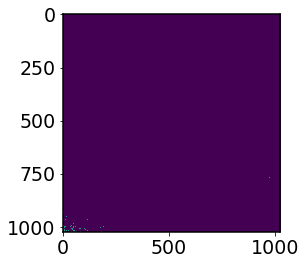

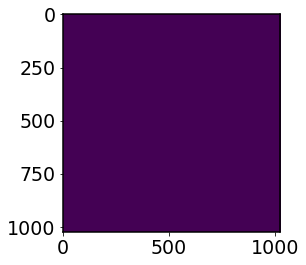

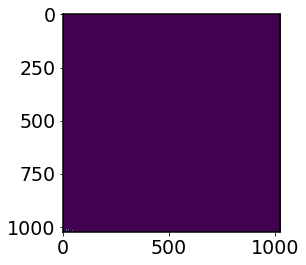

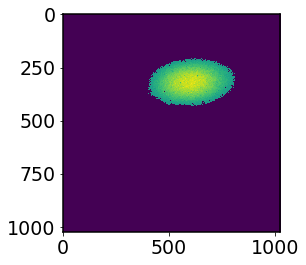

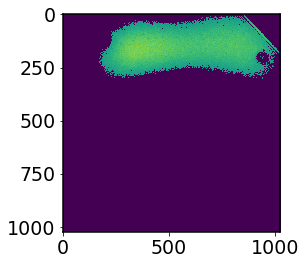

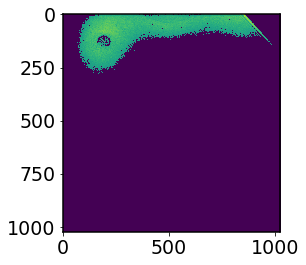

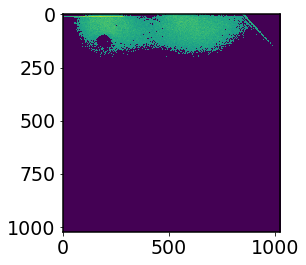

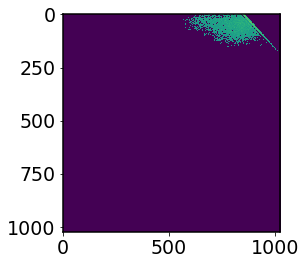

In [115]:
linhas = list()
for i in range(len(matrxs)):
    new_matrix = threshold(matrxs[i], t = 135, color = 0) #com 80 uma delas fica bue pretty
    new_img    = matrix_to_img(new_matrix)
    
    plt.figure()
    plt.imshow(new_img)
    
    linhas.append(soma_linhas(new_matrix))

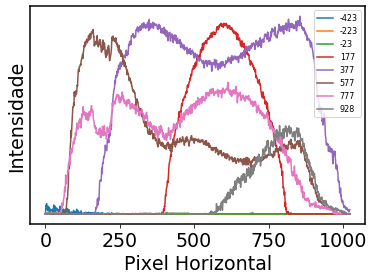

In [118]:
i = 0
for hist in linhas:
    plt.plot(hist, label = iris[i])
    plt.legend(fontsize = 8)
    plt.yticks([])
    plt.ylabel('Intensidade')
    plt.xlabel('Pixel Horizontal')
    i += 1

O plot que se segue não tem grande significado físico

In [127]:
iris_x = [float(i) for i in iris]
iris_y = [integrate(linha) for linha in linhas]

(0, 1.1)

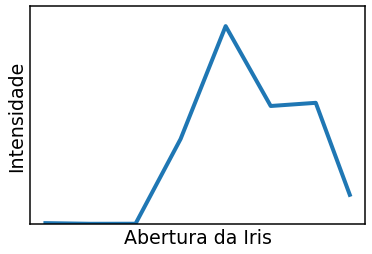

In [129]:
plt.plot(iris_x, normalize(iris_y), lw = 4)
plt.yticks([])
plt.xticks([])
plt.ylabel('Intensidade')
plt.xlabel('Abertura da Iris')

plt.ylim(0, 1.1)